En esta sección intentaremos analizar audios .wav para determinar a que clase pertenece. 
clases posibles:
    Normal, Murmur, Extra Heart Sound, Artifact.

In [71]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

>a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay por clase.

In [72]:
import pandas as pd
import numpy as np
df = pd.read_csv('set_a.csv')

In [73]:
df.head(2)

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN


In [74]:
df.label.unique()

array(['artifact', 'extrahls', 'murmur', 'normal', nan], dtype=object)

Se aprecia que dentro de las categorias hay algunas con valores nan

In [75]:
print (df.label.value_counts())

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


>b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [76]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['label']=df['label']
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df['len_series'] = new_df['time_series'].apply(len)
new_df.head(5)

,file_name,label,time_series,len_series
0,artifact__201012172012.wav,artifact,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,artifact,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,artifact,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,artifact,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,artifact,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900


Este paso es de gran importancia ya que necesitamos que todos los datos 
Tambien es importante notar que todos los archivos que no tenian categoria se les agrego "Aunlabelledtest" en el nombre para que así concordara con los archivos .wav

>c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4], el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [77]:
new_df['label'].value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [78]:
new_df['label'].value_counts()
new_labels =np.zeros(176)
new_labels[41:59]=1
for x in [40, 55]:
    new_labels[x] = 2
new_labels[59:93] = 2
for x in [62,63,65,68]:
    new_labels[x] = 1
new_labels[93:124] = 1
for x in [101, 107, 115, 116, 122]:
    new_labels[x] = 2
new_labels[124:]=[0,2,2,1,1,1,1,1,0,1,0,1,1,1,2,1,0,1,1,1,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,1,2,2,2,2,2,2,2,2,2,2,2]



strArr = np.empty(176, dtype=object)
for i in range (176):
    if new_labels[i]==0:
        strArr[i]='artifact'
    if new_labels[i]==1:
        strArr[i]='normal/extrahls'
    if new_labels[i]==2:
        strArr[i]='murmur'  
        
new_df['targetNumber']=new_labels
new_df['targetString'] = strArr
new_df.head()


,file_name,label,time_series,len_series,targetNumber,targetString
0,artifact__201012172012.wav,artifact,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,0.0,artifact
1,artifact__201105040918.wav,artifact,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,0.0,artifact
2,artifact__201105041959.wav,artifact,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,0.0,artifact
3,artifact__201105051017.wav,artifact,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0.0,artifact
4,artifact__201105060108.wav,artifact,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,0.0,artifact


In [79]:
new_df['targetString'].value_counts()

normal/extrahls    65
artifact           58
murmur             53
Name: targetString, dtype: int64

Se creo una nueva columna con los datos bien categorizados que se le llamo "targetString".

Efectivamente este paso es de vital importancia, ya que al tener datos mal categorizados nuestra maquina aprende mal. 

Si se tiene solo un dato mal categorizado nos contaminaria el entrenamiento de la maquina, pero este no influye mucho debido a la gran cantidad de datos que se tiene. Por eso mismo podemos decir que mientras mas datos se tengan mas despreciable es un mal ejemplo y si se tiene menos datos influye mas.

>d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos clasificadores.

Este paso se aprovecho de hacer en la pregunta "c" y se le llamo "targetNumber".

>e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

In [80]:
new_df = new_df.sample(frac=1,random_state=44)

In [81]:
new_df.head(3)

,file_name,label,time_series,len_series,targetNumber,targetString
3,artifact__201105051017.wav,artifact,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0.0,artifact
126,Aunlabelledtest__201101061552.wav,NaN,"[96.0, 90.0, 84.0, 64.0, 66.0, 44.0, 50.0, 32....",396900,2.0,murmur
45,extrahls__201101161027.wav,extrahls,"[220.0, 191.0, 171.0, 138.0, 202.0, 196.0, 211...",396900,1.0,normal/extrahls


In [82]:
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.targetNumber.values

In [83]:
X.shape

(176, 396900)

In [84]:
y

array([0., 2., 1., 0., 2., 0., 0., 1., 2., 2., 1., 1., 0., 2., 1., 1., 1.,
       1., 0., 0., 2., 1., 0., 0., 0., 1., 2., 2., 2., 1., 2., 1., 2., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 2., 1., 0., 2., 1., 0., 1., 2., 0.,
       0., 2., 1., 1., 2., 1., 2., 1., 2., 0., 1., 1., 2., 1., 0., 1., 1.,
       1., 1., 2., 0., 0., 0., 0., 0., 2., 0., 1., 1., 0., 0., 0., 2., 1.,
       1., 0., 1., 0., 2., 1., 0., 0., 0., 2., 2., 0., 2., 1., 1., 0., 1.,
       0., 2., 1., 1., 0., 0., 2., 2., 2., 1., 1., 0., 0., 2., 2., 2., 1.,
       1., 2., 0., 0., 1., 1., 1., 2., 1., 1., 0., 0., 0., 1., 1., 2., 1.,
       1., 0., 0., 2., 0., 1., 0., 2., 1., 2., 2., 0., 0., 2., 2., 0., 2.,
       2., 2., 1., 1., 2., 0., 0., 1., 1., 1., 2., 0., 2., 0., 1., 2., 2.,
       1., 1., 2., 2., 2., 0.])

La dimesión de esta gran matriz puede generar 2 problemas, el primero es que la capacidad de procesamiento que consume al ser procesado los dato y el segundo es que al tener tantas dimensiones deben haber algunos datos que no aportan a nuestro modelo, por lo cual tenemos que buscar cuales son los mas significativos.

>f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.

In [86]:
X_fourier = np.abs(np.fft.fft(X))

In [87]:
X_fourier

array([[ 178117.        ,  547530.62464519, 1089559.92330764, ...,
         233192.12529808, 1089559.92330764,  547530.62464519],
       [ 205083.        ,  207594.34125677,  249731.48468497, ...,
         263086.58181293,  249731.48468497,  207594.34125677],
       [1065463.        ,  443005.60828815,  336340.94408033, ...,
         133880.55699928,  336340.94408033,  443005.60828815],
       ...,
       [2560689.        , 1797252.47627465, 1779494.39279086, ...,
        2027365.28881495, 1779494.39279086, 1797252.47627465],
       [ 549835.        , 3218604.15040447,  937083.3674308 , ...,
         248018.11686898,  937083.3674308 , 3218604.15040447],
       [ 739686.        ,  393704.52037108,  851907.98422727, ...,
        1366322.93343479,  851907.98422727,  393704.52037108]])

In [88]:
X_fourier.shape

(176, 396900)

A continuación se ve la representación del cambio.

In [90]:
from scipy import stats
print X
print X.shape
print stats.describe(X[0])
print "\n***********\n"
print X_fourier
print X_fourier.shape
print stats.describe(X_fourier[0])

[[  -85.  -198.  -214. ...  -110.   -74.   -76.]
 [   96.    90.    84. ...     0.     0.     0.]
 [  220.   191.   171. ...     0.     0.     0.]
 ...
 [  376.   413.   429. ...     0.     0.     0.]
 [ -404.  -442.  -456. ...     0.     0.     0.]
 [-2169. -2661. -1605. ...   435.   373.   417.]]
(176, 396900)
DescribeResult(nobs=396900, minmax=(-29660.0, 28892.0), mean=-0.44877047115142354, variance=345450.211931373, skewness=-1.071064514169327, kurtosis=329.85051411240937)

***********

[[ 178117.          547530.62464519 1089559.92330764 ...  233192.12529808
  1089559.92330764  547530.62464519]
 [ 205083.          207594.34125677  249731.48468497 ...  263086.58181293
   249731.48468497  207594.34125677]
 [1065463.          443005.60828815  336340.94408033 ...  133880.55699928
   336340.94408033  443005.60828815]
 ...
 [2560689.         1797252.47627465 1779494.39279086 ... 2027365.28881495
  1779494.39279086 1797252.47627465]
 [ 549835.         3218604.15040447  937083.3674308  ..

>g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

Al aplicar la función resample cambia la forma de muestreo aumentando el tiempo total registrado por cada columna de la matriz. Ej: si antes por cada columna se registraba 1 segundo. ahora por cada columna se registran 3 seg. Lo anterior sirve para disminuir la dimensionalidad del problema. 

Para saber si es representativo se podria comparar los valores adyacentes de la matriz en el tiempo y si los valores son muy distintos entre si significa que la muestra a cambiado mucho. 


In [89]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape


(176, 100000)

In [19]:
X_resampled

array([[ 619562.07321251,  390165.06006105,  313107.06023288, ...,
         369442.478576  ,  313107.06023288,  390165.06006105],
       [ 190983.14319535,  227856.25010899,  234027.19467463, ...,
         214362.66206785,  234027.19467463,  227856.25010899],
       [ 514362.79527397,  289818.11832802,  344134.44483949, ...,
         398388.99723239,  344134.44483949,  289818.11832802],
       ...,
       [2498392.41059092, 1323021.69974666, 1956726.02668511, ...,
         527032.62769373, 1956726.02668511, 1323021.69974666],
       [1701039.18357162,  927198.73406466,  929414.45354862, ...,
        1202877.38348426,  929414.45354862,  927198.73406466],
       [ 220645.28159303, 2142360.0163202 , 1042164.94573052, ...,
        2286331.00809641, 1042164.94573052, 2142360.01632019]])

In [20]:
print (y.shape)
print (X_resampled.shape)

(176,)
(176, 100000)


>h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad final del modelo, genérelo a través de la técnica hold-out

Primero se usara un 20% holdout y despues del 80% restante se usara 25% será test y 75% será validation.

In [21]:
from sklearn.model_selection import train_test_split
X_a, X_HOLD, y_a, y_HOLD = train_test_split(X_resampled, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.25, random_state=42)

In [22]:
print "x& y"
print (X_resampled.shape)
print (y.shape)
print "x holdout & y holdout"
print (X_HOLD.shape)
print (y_HOLD.shape)
print "x train & y train"
print (X_train.shape)
print (y_train.shape)
print "x test & y test"
print (X_test.shape)
print (y_test.shape)

x& y
(176, 100000)
(176,)
x holdout & y holdout
(36, 100000)
(36,)
x train & y train
(105, 100000)
(105,)
x test & y test
(35, 100000)
(35,)


>i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [23]:
print np.mean(X_train) 
print np.std(X_train) 

275293.52526891837
2139488.115459216


In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

>j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en  𝑑=2  dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones

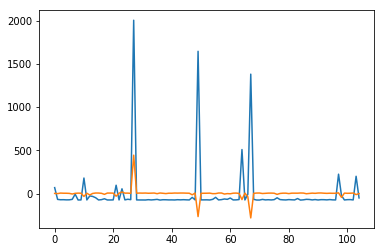

In [65]:
from sklearn.decomposition import PCA
def model_d_PCA(d):
    return PCA(n_components=d)
d=2
pca_model = model_d_PCA(d)

pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

import matplotlib.pyplot as plt
plt.plot(X_pca_train)
plt.show()

>k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización  𝐶  construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización  𝛼  en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de  𝐶  o  𝛼 . Compare y comente lo observado.

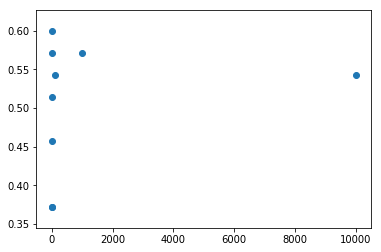

In [66]:
#Logistic REGRESSION
from sklearn.linear_model import LogisticRegression
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = LogisticRegression(penalty='l2', C=x,max_iter=200)
    model.fit(X_pca_train,y_train)   
    y=model.score(X_pca_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
def plot(data):
    x,y=data.T
    plt.scatter(x,y)
    plt.show()
plot(data)

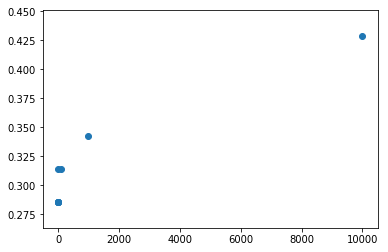

In [67]:
#PERCEPTRON
from sklearn.linear_model import Perceptron
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = Perceptron(penalty='l2', alpha=1.0/x, max_iter=200)
    model.fit(X_pca_train,y_train)  
    y=model.score(X_pca_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
plot(data)

Se peude ver que el accuracy de la regresión logistica es mucho mejor que el del perceptrón. Podemos darnos cuenta que C no es directamente proporcional al accuracy de la regresión logistica, mientras que alpha es inversamente proporcional al accuracy de el perceptrón. Por esto mismo se usa el inverso de C como alpha.

>l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad ICA, con dimensionalidad  𝑑=2 . Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.

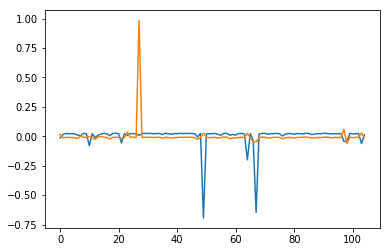

In [68]:
from sklearn.decomposition import FastICA
def model_d_ICA(d):
    return FastICA(n_components=d)

d=2
ica_model = model_d_ICA(d)

ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)

import matplotlib.pyplot as plt
plt.plot(X_ica_train)
plt.show()

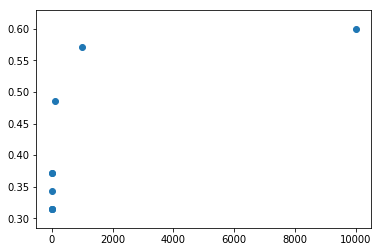

In [69]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = LogisticRegression(penalty='l2', C=x,max_iter=200)
    model.fit(X_ica_train,y_train)   
    y=model.score(X_ica_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
def plot(data):
    x,y=data.T
    plt.scatter(x,y)
    plt.show()
plot(data)

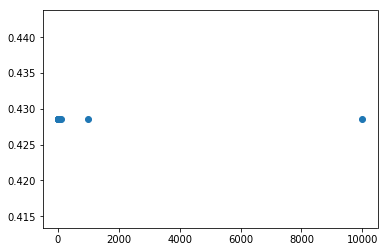

In [70]:
#PERCEPTRON
from sklearn.linear_model import Perceptron
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = Perceptron(penalty='l2', alpha=1.0/x, max_iter=200)
    model.fit(X_ica_train,y_train)  
    y=model.score(X_ica_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
plot(data)

>m) Experimente con diferentes dimensiones  𝑑  para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o accuracy, comente.

In [55]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
print "Tipo \t\t| Dimensión \t| Accuracy "
for d in [2,10,50,100,1000, 10000]:
    ica_model = model_d_ICA(d)
    ica_model.fit(X_train)
    X_ica_train = ica_model.transform(X_train)
    X_ica_test = ica_model.transform(X_test)
    
    model = LogisticRegression(penalty='l2', C=10,max_iter=200)
    model.fit(X_ica_train,y_train)   
    y=model.score(X_ica_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
    print "ICA \t\t| " + str(d)+ "\t\t| " + str(y)
    
    pca_model = model_d_PCA(d)
    pca_model.fit(X_train)
    X_pca_train= pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    
    model = LogisticRegression(penalty='l2', C=10,max_iter=200)
    model.fit(X_pca_train,y_train)   
    y=model.score(X_pca_test,y_test)
    if (i==0):
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
        
    print "PCA \t\t| " + str(d) + "\t\t| " + str(y)

Tipo 		| Dimensión 	| Accuracy 
ICA 		| 2		| 0.37142857142857144
PCA 		| 2		| 0.6
ICA 		| 10		| 0.5714285714285714
PCA 		| 10		| 0.8
ICA 		| 50		| 0.7428571428571429
PCA 		| 50		| 0.6857142857142857
ICA 		| 100		| 0.7428571428571429
PCA 		| 100		| 0.7714285714285715
ICA 		| 1000		| 0.42857142857142855
PCA 		| 1000		| 0.7428571428571429
ICA 		| 10000		| 0.42857142857142855
PCA 		| 10000		| 0.7428571428571429


Para comparar el ICA con el PCA se uso regresión logistica para calcular el accuracy de cada uno con diferentes dimensiones. 

Se puede apreciar que uno no es superior al otro para todas las dimensiones, pero podemos ver que el mayor accuracy se produce con pocas dimensiones, por lo cual podemos que ver mayor cantidad de dimensiones no es mayor accuracy. Con esto podemos concluir que al momento de reducir dimensiones se recomienda revisar cuantas dimensiones es lo ideal, en este caso seria usar PCA con 10 dimensiones.

>n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en  𝑑=2  dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

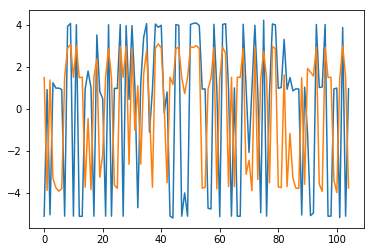

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)

import matplotlib.pyplot as plt
plt.plot(X_lda_train)
plt.show()

En este caso el LDA eligio dos frecuencias, pero arroja un warning ya que son todas linialmente dependientes, debido a que son armonicas. Es bueno decir que LDA elije las variables que son linealmente independientes.

>o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las  𝑑  dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.

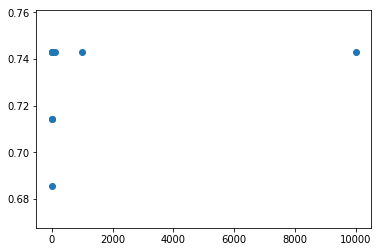

In [60]:
#Logistic REGRESSION
from sklearn.linear_model import LogisticRegression
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = LogisticRegression(penalty='l2', C=x,max_iter=200)
    model.fit(X_lda_train,y_train)   
    y=model.score(X_lda_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
def plot(data):
    x,y=data.T
    plt.scatter(x,y)
    plt.show()
plot(data)

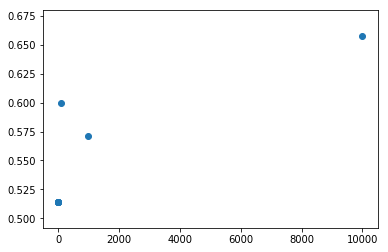

In [61]:
#PERCEPTRON
from sklearn.linear_model import Perceptron
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in range (9):
    x=Cs[i]
    model = Perceptron(penalty='l2', alpha=1.0/x, max_iter=200)
    model.fit(X_lda_train,y_train)  
    y=model.score(X_lda_test,y_test)
    if i==0:
        data=np.array([[x,y]])
    else:
        newrow=[x,y]
        data=np.vstack([data,newrow])
plot(data)

>p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6], [7] si desea.